In [1]:
import pandas as pd
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read pre-processed data
data = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/preprocessed_twitter_2018_rahip_brunson.csv')

In [4]:
print(data)

       Unnamed: 0                                              tweet  \
0               0  gold settles higher recent downdraft, inflatio...   
1               1  gloves wedding lace ivory bridalgown weddingdr...   
2               2  boston happening tomorrow _music!! tickets now...   
3               3  第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7...   
4               4  gold gains 1 percent dollar retreat, short-cov...   
...           ...                                                ...   
45595       45595  looking low rate credit card? check best deals...   
45596       45596  federal reserve released non-cash payments fra...   
45597       45597      compare creditcards best suits needs: flm2018   
45598       45598  better apr creditcards cleaning creditreport e...   
45599       45599  value customers? protect credit card data free...   

       Subjectivity  Polarity  Analysis  
0          0.283333  0.116667  Positive  
1          0.600000  0.500000  Positive  
2        

In [5]:
# getting labels from pre-processed dataset
label = data.iloc[:, -1:].values
print(label)

[['Positive']
 ['Positive']
 ['Negative']
 ...
 ['Positive']
 ['Positive']
 ['Positive']]


In [6]:
# data.iloc[:,:-1] get all the columns except label column - for the X_train
X_train, X_test, y_train, y_test = train_test_split (data['tweet'], label, test_size=0.2, random_state=0)

In [7]:
# label encoder
Encoder = LabelEncoder()
print(y_train[:10])

y_train = Encoder.fit_transform(y_train)
print(y_train[:10])

y_test = Encoder.fit_transform(y_test)

[['Positive']
 ['Positive']
 ['Neutral']
 ['Neutral']
 ['Neutral']
 ['Neutral']
 ['Neutral']
 ['Neutral']
 ['Positive']
 ['Positive']]
[2 2 1 1 1 1 1 1 2 2]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.
# more info: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = LinearSVC()

# train
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [10]:
# predict the labels on validation dataset
predictions_SVM = svc.predict(X_test_tfidf)

In [11]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9967105263157895


### 2. Learning Curve

In [12]:
train_sizes, train_scores, test_scores = learning_curve(LinearSVC(), X_train_tfidf, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

[learning_curve] Training set sizes: [  328   991  1655  2318  2981  3645  4308  4971  5635  6298  6961  7625
  8288  8951  9615 10278 10941 11605 12268 12931 13595 14258 14921 15585
 16248 16911 17575 18238 18901 19565 20228 20891 21555 22218 22881 23545
 24208 24871 25535 26198 26861 27525 28188 28851 29515 30178 30841 31505
 32168 32832]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.7min finished


In [13]:
# getting mean values of training score
train_mean = np.mean(train_scores, axis=1)
train_mean

array([1.        , 0.99989909, 0.99987915, 0.99991372, 0.99993291,
       0.99969822, 0.99955896, 0.99943673, 0.99946761, 0.9994919 ,
       0.99964086, 0.99956721, 0.99963803, 0.99966484, 0.9999064 ,
       0.99991243, 0.99991774, 0.99995692, 0.99995924, 0.99996133,
       0.99996322, 0.99993688, 0.99993968, 0.99990375, 0.99990768,
       0.9999113 , 0.9998862 , 0.99989034, 0.99989419, 0.99989778,
       0.99986652, 0.9999282 , 0.99993041, 0.99993249, 0.99990385,
       0.99990656, 0.99990499, 0.99993567, 0.99993734, 0.99993893,
       0.99993299, 0.9999346 , 0.99993614, 0.99995841, 0.99995934,
       0.99996024, 0.99996109, 0.99996191, 0.9999627 , 0.9999665 ])

In [14]:
train_std = np.std(train_scores, axis=1)

In [15]:
test_mean = np.mean(test_scores, axis=1)

In [16]:
#standard dev.
test_std = np.std(test_scores, axis=1)

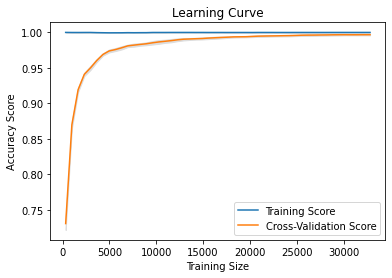

In [17]:
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

### 2. Model Evaluation
>**TN / True Negative:** the case was negative and predicted negative<br>
**TP / True Positive:** the case was positive and predicted positive<br>
**FN / False Negative:** the case was positive but predicted negative<br>
**FP / False Positive:** the case was negative but predicted positive<br>

#### 2.1. Accuracy

In [18]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9967105263157895


#### 2.2. F-Measure
>**What percent of positive predictions were correct?**<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [19]:
print(f1_score(y_test, predictions_SVM, average="macro"))

0.9963324266594692


#### 2.3. Precision
>**Accuracy of positive predictions.**<br>
Precision = TP/(TP + FP)

In [20]:
print(precision_score(y_test, predictions_SVM, average="macro"))

0.9971162565042763


#### 2.4. Recall
>**What percent of the positive cases did you catch?**<br>
Recall = TP/(TP+FN)



In [21]:
print(recall_score(y_test, predictions_SVM, average="macro")) 

0.9955580104178168


#### 2.5. AUC (Area Under Curve)
>*AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.<br>
A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.*

>We have three classes in the dataset. Therefore, we will calculate ROC value for all classes.<br>
**Labels are expressed in binary format with one-hot encoding.**<br>
***ROC Curve is obtained as much as the number of classes.***

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


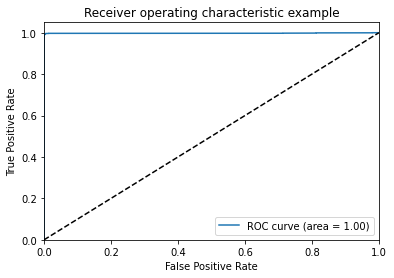

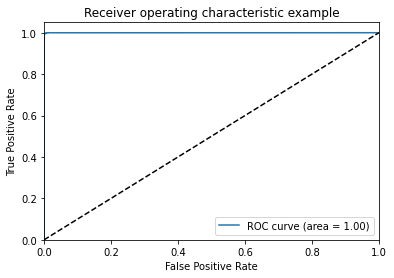

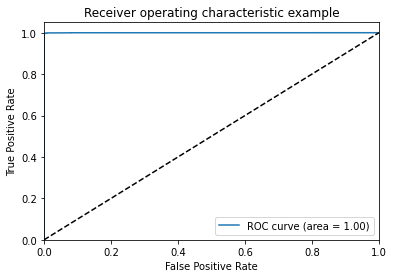

In [22]:
X, y = data['tweet'], label

y = Encoder.fit_transform(y)

y = preprocessing.label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))

# classifier
clf = OneVsRestClassifier(LinearSVC())

# train
y_score = clf.fit(X_train_tfidf, y_train).decision_function(X_test_tfidf)

# predict the labels on validation dataset
#predictions_SVM = clf.predict(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()